# Topics addressed
- Absolute and relative frequencies
- Empirical distribution function
- Boxplot and histograms
- Measures of central tendency
---
DDT is extremely effective against malaria and is therefore widely used in areas where malaria is endemic.
For a sample of n = 2312 pregnant women, the dde is measured, which is a substance related to ddt, present in the maternal serum during the third trimester of pregnancy. 

**Research question:** is the amount of DDE greater among women who have given birth prematurely?

## Import dataframe
**To start**, import DDE dataframe

In [1]:
dde_df <- read.table('dataframes/DDE.csv', header=TRUE, sep=";")
print(dde_df)
# The variable GAD (Gestational Age at Delivery) measures on which day of the pregnancy the birth took place.

        DDE GAD
1     24.56 292
2     15.56 289
3     54.80 252
4     15.00 285
5     33.54 281
6     22.68 283
7     25.02 277
8     31.85 284
9     37.45 293
10    32.27 277
11    31.43 280
12    27.37 255
13    15.23 261
14    31.23 289
15    54.39 296
16    18.11 260
17    79.70 297
18    15.68 270
19    29.43 282
20    12.62 280
21    22.92 278
22     9.51 263
23    10.94 308
24    23.16 287
25    10.51 290
26    13.82 291
27    26.80 276
28    17.91 284
29    28.01 248
30    88.65 287
31    23.90 272
32    16.42 266
33    23.47 295
34    20.42 283
35    15.94 282
36    38.61 271
37    34.17 285
38     6.34 225
39     6.28 223
40    22.60 285
41    24.69 296
42    40.34 278
43    47.29 288
44    14.62 282
45    22.53 271
46    19.86 287
47    17.40 282
48    42.06 279
49    10.75 268
50    11.14 278
51    31.81 274
52    21.51 308
53    12.52 267
54    18.54 270
55    25.61 242
56    24.38 266
57    15.74 261
58    11.40 288
59    25.02 235
60    25.66 285
61    15.19 271
62    14

A total of **361 women gave birth prematurely** (before the end of the 37−th week)
We can verify this, divide the DDE column in two groups: *DDE for woman with premature child* and *DDE form woman without premature child*


In [2]:
dde_premature <- dde_df$DDE[dde_df$GAD < 37*7]
dde_non_premature <- dde_df$DDE[dde_df$GAD >= 37*7]

sprintf("Number of womand with premature child: %d", length(dde_premature))
sprintf("Number of womand with premature child: %d", length(dde_non_premature))


[1] "Number of womand with premature child: 361"

[1] "Number of womand with premature child: 1951"

To summarize data by **frequencies**, we can divide the interval that contains all observed values
We define the 10 sub-intervals of length 18
In this way, we transform a **numeric variable into a factor variable**

In [3]:
breaks <- 18 * (0:10)
dde_premature_class <- cut(dde_premature, breaks = breaks)
dde_non_premature_class <- cut(dde_non_premature, breaks=breaks)

head(dde_premature_class)

[1] (54,72] (18,36] (18,36] (0,18]  (0,18]  (18,36]
10 Levels: (0,18] (18,36] (36,54] (54,72] (72,90] (90,108] ... (162,180]

## Absolute frequency
In the previous cell we have created only the levels with different intervals.  
Now, we can add **Absolute frequency** for each intervals.

In [4]:
abs_frequency_dde_premature = table(dde_premature_class)
abs_frequency_dde_non_premature = table(dde_non_premature_class)

print(abs_frequency_dde_premature)
print(abs_frequency_dde_non_premature)

dde_premature_class
   (0,18]   (18,36]   (36,54]   (54,72]   (72,90]  (90,108] (108,126] (126,144] 
       68       164        65        34        14        10         3         1 
(144,162] (162,180] 
        1         1 
dde_non_premature_class
   (0,18]   (18,36]   (36,54]   (54,72]   (72,90]  (90,108] (108,126] (126,144] 
      573       906       308        91        40        19         6         5 
(144,162] (162,180] 
        2         1 


## Relative frequency

In [5]:
rel_frquency_premature <- round((abs_frequency_dde_premature / sum(abs_frequency_dde_premature)),3)
rel_frquency_non_premature <- round((abs_frequency_dde_non_premature / sum(abs_frequency_dde_non_premature)),3)


print(rel_frquency_premature)
print("")
print(rel_frquency_non_premature)

dde_premature_class
   (0,18]   (18,36]   (36,54]   (54,72]   (72,90]  (90,108] (108,126] (126,144] 
    0.188     0.454     0.180     0.094     0.039     0.028     0.008     0.003 
(144,162] (162,180] 
    0.003     0.003 
[1] ""
dde_non_premature_class
   (0,18]   (18,36]   (36,54]   (54,72]   (72,90]  (90,108] (108,126] (126,144] 
    0.294     0.464     0.158     0.047     0.021     0.010     0.003     0.003 
(144,162] (162,180] 
    0.001     0.001 


## Summary table with absolute and relative frequency

In [6]:
table_summary <- cbind(abs_frequency_dde_premature, abs_frequency_dde_non_premature, rel_frquency_premature, rel_frquency_non_premature)
colnames(table_summary) <- c("abs freq premature", "abs freq non premature", "rel freq premature", "rel freq non premature")
print(table_summary)

          abs freq premature abs freq non premature rel freq premature
(0,18]                    68                    573              0.188
(18,36]                  164                    906              0.454
(36,54]                   65                    308              0.180
(54,72]                   34                     91              0.094
(72,90]                   14                     40              0.039
(90,108]                  10                     19              0.028
(108,126]                  3                      6              0.008
(126,144]                  1                      5              0.003
(144,162]                  1                      2              0.003
(162,180]                  1                      1              0.003
          rel freq non premature
(0,18]                     0.294
(18,36]                    0.464
(36,54]                    0.158
(54,72]                    0.047
(72,90]                    0.021
(90,108]             

# Histograms
Now, we can represent a frequency distribution on an histogram.  
The **x axis** is the **Length of intervals**, and the **y axis** is the **absolute frequency**.


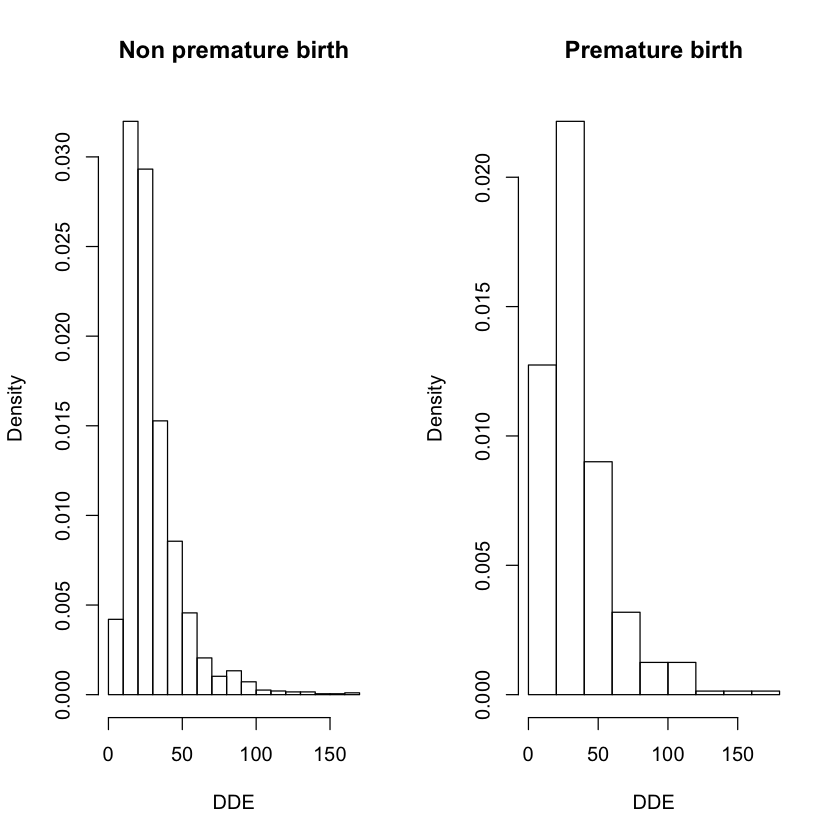

In [7]:
# split the plot in 2 parts
par(mfrow = c(1,2))

# First plot, Absolute frequency
hist(dde_non_premature,
     freq = FALSE,
     main="Non premature birth",
     xlab="DDE",
     ylab="Density"
)

# Second plot, density
hist(dde_premature,
    freq=FALSE,
    main="Premature birth",
    xlab="DDE",
    ylab="Density"
)

## Empirical cumulative distribution function
Second frequently used graphical representation.

[1] 0.3618657 0.8077909 0.9390056

Empirical CDF 
Call: ecdf(dde_non_premature)
 x[1:1585] =    2.5,   2.95,   3.14,  ..., 161.11, 162.29


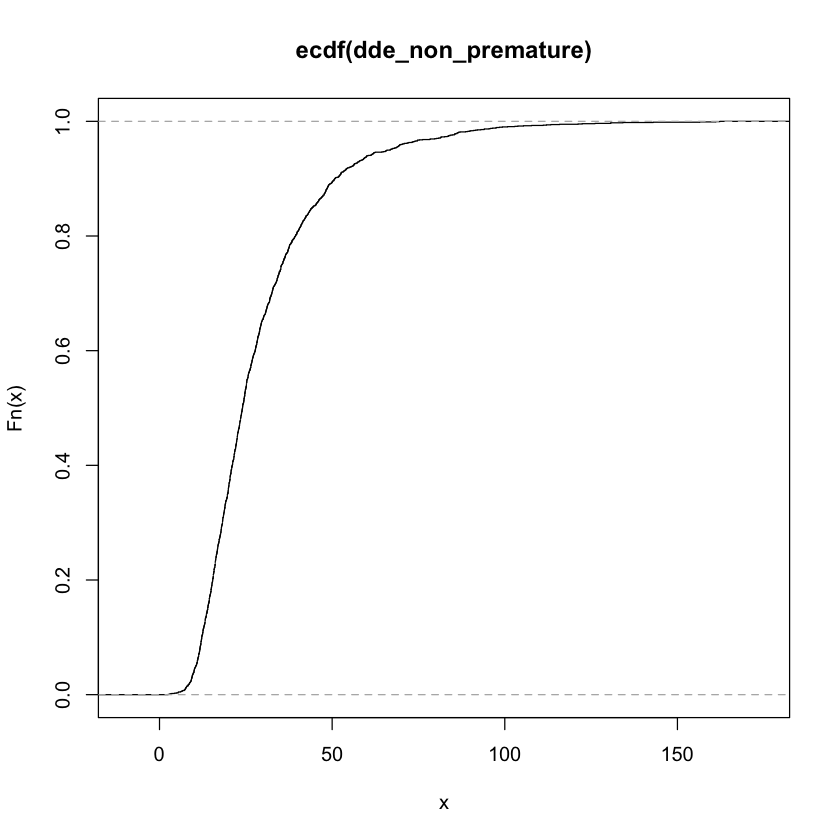

In [12]:
ecdf_dde_non_premature <- ecdf(dde_non_premature)
ecdf_dde_non_premature(c(20,40,60))
print(ecdf_dde_non_premature)
      
par(mfrow=c(1,1))
plot(ecdf(dde_non_premature))

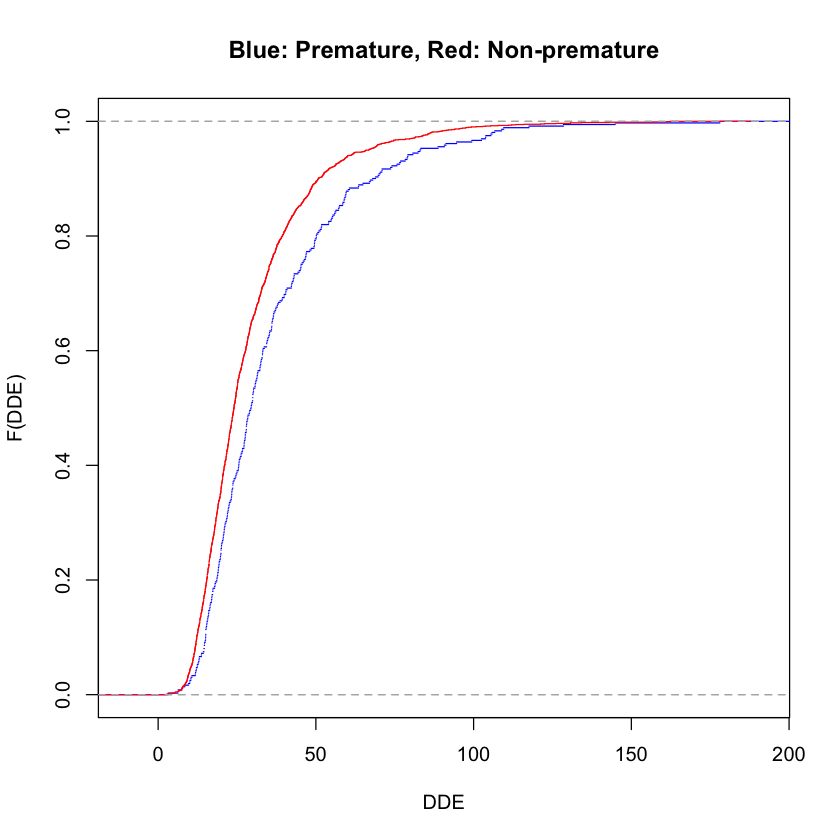

In [18]:
# Compare the two groups
# The option do.points = FALSE omits the “dots” in the graph
plot(ecdf(dde_premature), do.points=FALSE, col="blue",
    main="Blue: Premature, Red: Non-premature",
    xlab="DDE",
    ylab="F(DDE)"
)
plot(ecdf(dde_non_premature), col="red", add=TRUE)

# Mean, median and quantile
To quantify the difference between the 2 distributions, we want to find the arithmetic mean of the two variables.

In [36]:
sprintf("Media of DDE Premature is: %f", round(mean(dde_premature), 5))
sprintf("Media of DDE Non-premature is: %f", round(mean(dde_non_premature), 5))

sprintf("Median of DDE Premature is: %f", round(median(dde_premature), 5))
sprintf("Median of DDE Non-premature is: %f", round(median(dde_non_premature), 5))
print("--------")

# For Quantile we can use an array of 4 probabilities: .1, .25, .75 and .9
quantile_dde_premature = quantile(dde_premature,  probs = c(0.1, 0.25, 0.75, 0.9), type=1)

sprintf("First decile of DDE Premature is: %f", quantile_dde_premature[1])
sprintf("First quartile of DDE Premature is: %f", quantile_dde_premature[2])
sprintf("Thirt quartile of DDE Premature is: %f", quantile_dde_premature[3])
sprintf("Ninth quartle of DDE Premature is: %f", quantile_dde_premature[4])
print("--------")

quantile_dde_non_premature = quantile(dde_non_premature,  probs = c(0.1, 0.25, 0.75, 0.9), type=1)

sprintf("First decile of DDE Non premature is: %f", quantile_dde_non_premature[1])
sprintf("First quartile of DDE Non premature is: %f", quantile_dde_non_premature[2])
sprintf("Thirt quartile of DDE Non premature is: %f", quantile_dde_non_premature[3])
sprintf("Ninth quartle of DDE Non premature is: %f", quantile_dde_non_premature[4])

[1] "Media of DDE Premature is: 36.202990"

[1] "Media of DDE Non-premature is: 29.141990"

[1] "Median of DDE Premature is: 29.460000"

[1] "Median of DDE Non-premature is: 24.040000"

[1] "--------"


[1] "First decile of DDE Premature is: 15.070000"

[1] "First quartile of DDE Premature is: 19.940000"

[1] "Thirt quartile of DDE Premature is: 45.300000"

[1] "Ninth quartle of DDE Premature is: 68.010000"

[1] "--------"


[1] "First decile of DDE Non premature is: 12.230000"

[1] "First quartile of DDE Non premature is: 16.730000"

[1] "Thirt quartile of DDE Non premature is: 35.450000"

[1] "Ninth quartle of DDE Non premature is: 50.720000"

# Summary
To read all of previous informations we can use Sumary command

In [37]:
summary(dde_premature)
summary(dde_non_premature)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.17   19.94   29.46   36.20   45.30  178.06 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.50   16.73   24.04   29.14   35.40  162.29 

# Boxplot

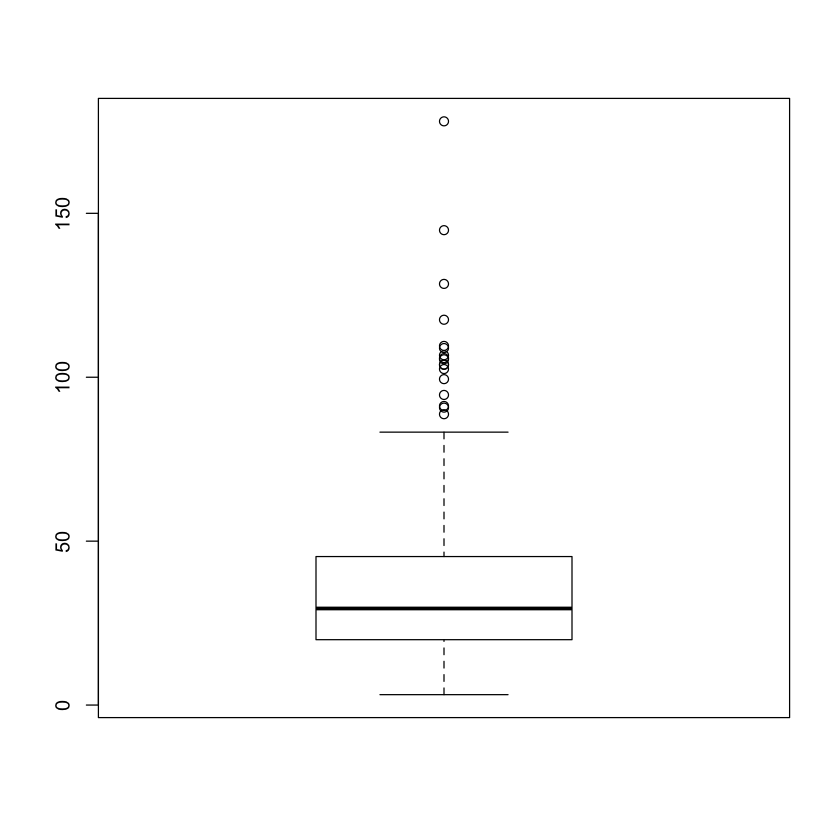

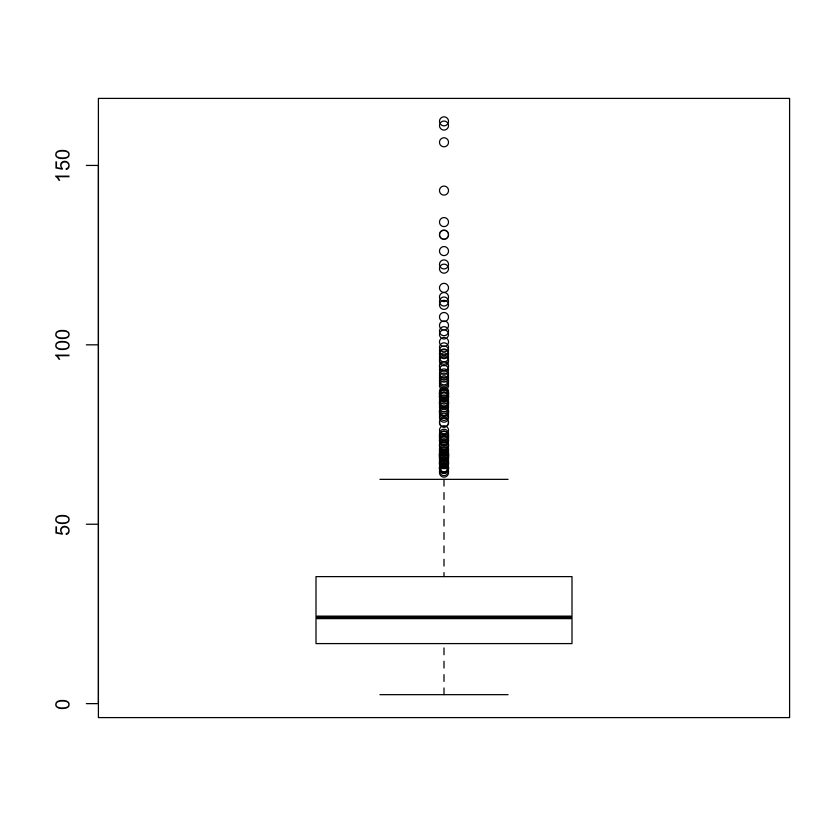

In [40]:
boxplot(dde_premature)
boxplot(dde_non_premature)